# Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load the dataset

In [17]:
DATA_DIR = '../data/'

In [18]:
df = pd.read_csv(DATA_DIR + 'books.csv')

# Inspection & EDA

In [19]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [24]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [25]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df[df["subtitle"].isna()][["title", "subtitle"]]

,title,subtitle
0,Gilead,NaN
2,The One Tree,NaN
3,Rage of angels,NaN
4,The Four Loves,NaN
5,The Problem of Pain,NaN
...,...,...
6803,Journey to the East,NaN
6804,The Monk Who Sold His Ferrari: A Fable About F...,NaN
6806,Secrets Of The Heart,NaN
6807,Fahrenheit 451,NaN


In [9]:
df[df["subtitle"].isna()][["title", "subtitle"]].head()

,title,subtitle
0,Gilead,NaN
2,The One Tree,NaN
3,Rage of angels,NaN
4,The Four Loves,NaN
5,The Problem of Pain,NaN


In [10]:
df[df["subtitle"].isna()][["title", "subtitle"]].tail()

,title,subtitle
6803,Journey to the East,NaN
6804,The Monk Who Sold His Ferrari: A Fable About F...,NaN
6806,Secrets Of The Heart,NaN
6807,Fahrenheit 451,NaN
6808,The Berlin Phenomenology,NaN


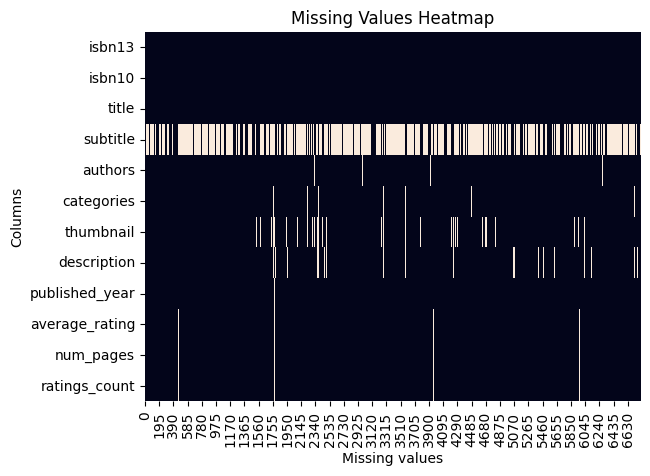

In [50]:
sns.heatmap(df.isna().transpose(), cmap='rocket', cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Missing values")
plt.ylabel("Columns")
plt.show()

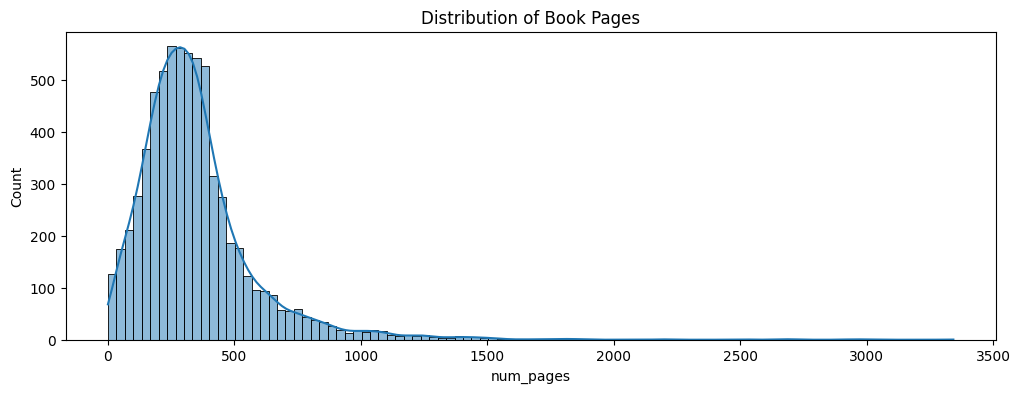

In [55]:
# Histograms
plt.figure(figsize=(12, 4))
sns.histplot(df['num_pages'], bins=100, kde=True)
plt.title("Distribution of Book Pages")
plt.show()

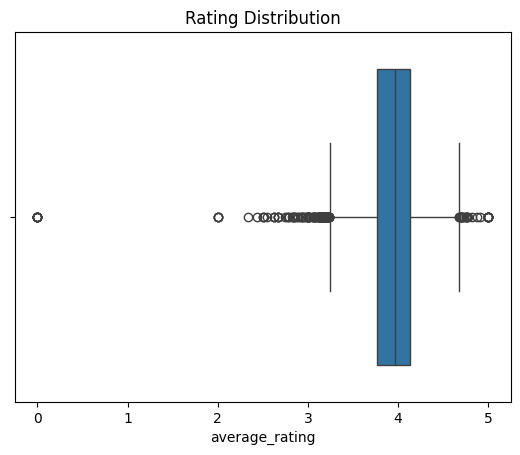

In [56]:
# Boxplots to check spread and outliers
sns.boxplot(x=df['average_rating'])
plt.title("Rating Distribution")
plt.show()

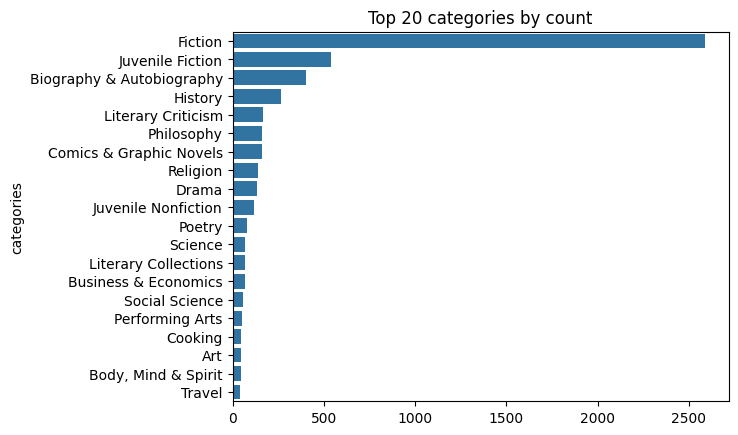

In [61]:
# Top 10 genres
genre_counts = df['categories'].value_counts().head(20)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 20 categories by count")
plt.show()

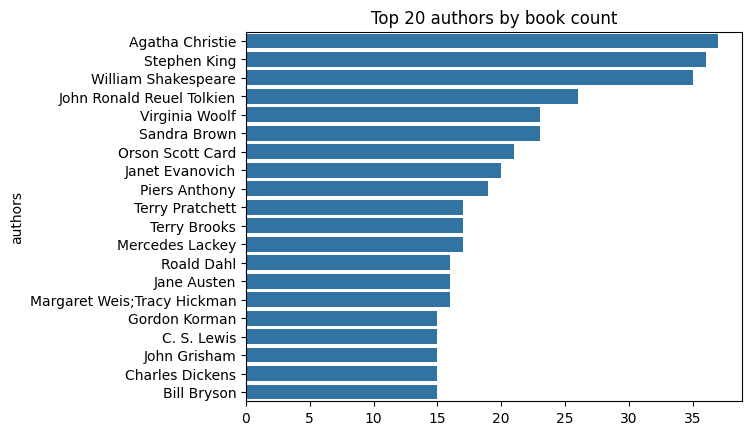

In [67]:
author_counts = df['authors'].value_counts().head(20)
sns.barplot(x=author_counts.values, y=author_counts.index)
plt.title("Top 20 authors by book count")
plt.show()

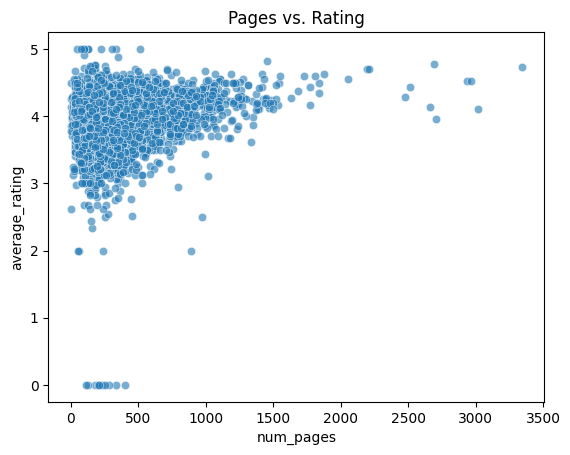

In [68]:
sns.scatterplot(x='num_pages', y='average_rating', data=df, alpha=0.6)
plt.title("Pages vs. Rating")
plt.show()

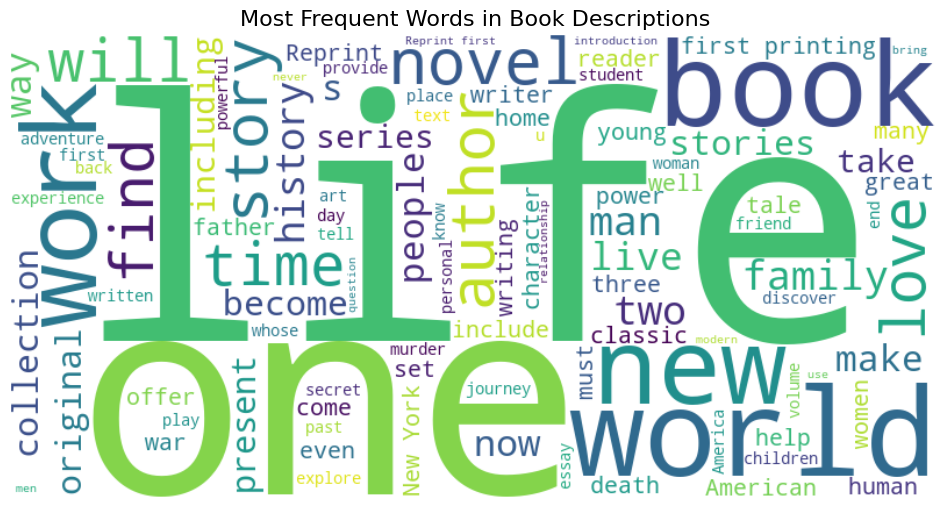

In [ ]:
text = ' '.join(df['description'].dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    stopwords=STOPWORDS,
    contour_width=3,
    contour_color='steelblue'
).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Book Descriptions", fontsize=16)
plt.show()